# Required Python Packages

In [1]:
#Import libraries

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder  # scikit-learn for preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reading Dataset

The Python code below reads the Walmart sales dataset into a Pandas data frame with the name df_data. For this code to work, the file 'Walmart Sales Data.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Walmart Sales Data.csv', encoding='latin1')

#return the datatype for each column of dataset
print('Datatype for each column in given dataset: \n',df_data.dtypes)

#return the first 5 rows of the dataset
df_data.head(5)

Datatype for each column in given dataset: 
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


# Data Preprocessing

In [3]:
# Check for the missing values in each column of dataset
print("Count of null Values of each column :\n", df_data.isnull().sum())
# As there are no null values, there is no need to handle null values

Count of null Values of each column :
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [4]:
# Drop duplicates based on Invoice ID as this column must have unique identifier
df_data.drop_duplicates(subset="Invoice ID", inplace=True)

# Preprocess Branch and City columns by Converting to lowercase and remove leading/trailing whitespaces
df_data['Branch'] = df_data['Branch'].str.lower().str.strip()
df_data['City'] = df_data['City'].str.lower().str.strip()

In [5]:
# Handling extreme values that might skew the analysis or modeling process
# Check for outliers and replace them with median
for z in ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']:
    cal_value= df_data[z].median()
    df_data[z] = np.where(df_data[z] > df_data[z].quantile(0.95), cal_value, df_data[z])

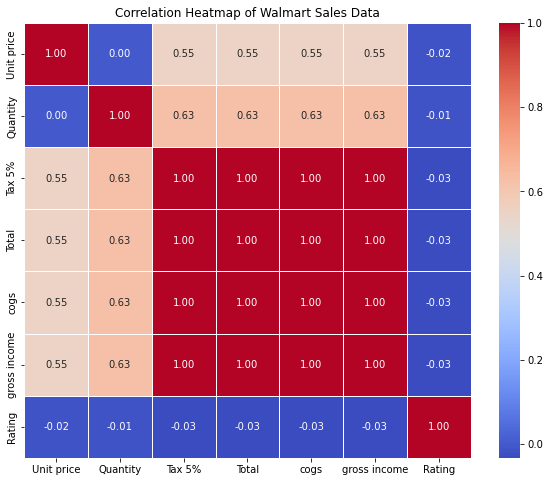

In [6]:
# Plot the heatmap 
df = df_data.drop(columns=['gross margin percentage'])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Walmart Sales Data')
plt.show()

# Research Question 1

In [7]:
# Aim is to predict the impact of branch's city on customer's purchase decisions.
# Linear regression model

# select the relevant columns for analysis
relavent_columns= ['Branch','City','Total']

# Encode categorical variables into numerical form
# assigns a unique integer to each category in a categorical variable
label_encoder = LabelEncoder()
df_data['City'] = label_encoder.fit_transform(df_data['City'])
df_data['Product line'] = label_encoder.fit_transform(df_data['Product line'])
df_data['Branch'] = label_encoder.fit_transform(df_data['Branch'])

# Define predictors and target variable
X = df_data[['Branch', 'City']]
y = df_data['Total']

# Train and fit the logistic regression model
X = sm.add_constant(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = ((y_pred - y_test) ** 2).mean()
print("Mean Squared Error:", mse)

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1648
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.848
Time:                        13:29:38   Log-Likelihood:                -5383.2
No. Observations:                 800   AIC:                         1.077e+04
Df Residuals:                     797   BIC:                         1.079e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        296.1248     18.895     15.672      0.0

**The low R-squared value of 0.000 in the Ordinary Least Squares (OLS) regression findings shows that the overall model does not significantly enhance the prediction of the total amount purchased based on the branch and city variables. This shows that the branch and city variables in the model do not adequately explain the variation in the total amount purchased. Furthermore, as shown by their p-values (p > 0.05), the coefficients for the branch and city variables are also not statistically significant. This suggests that, when all other factors are held constant, there is no evidence to support the claim that the branch or the city significantly affects the overall amount purchased.**

**Moreover, the testing data's mean squared error (MSE), which came out to 46443.25, is rather large. This implies that there is a substantial discrepancy between the model's predicted total purchases and the actual amounts. Overall, these findings suggest that the branch and city variables in the model are insufficient to predict the total amount purchased with any degree of accuracy. To increase the model's predictive ability, more variables or an alternative modeling strategy might be required.**


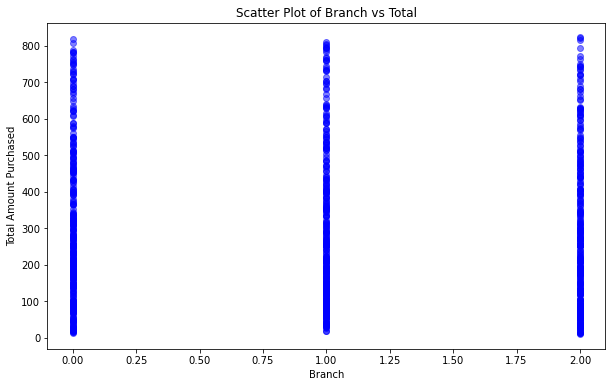

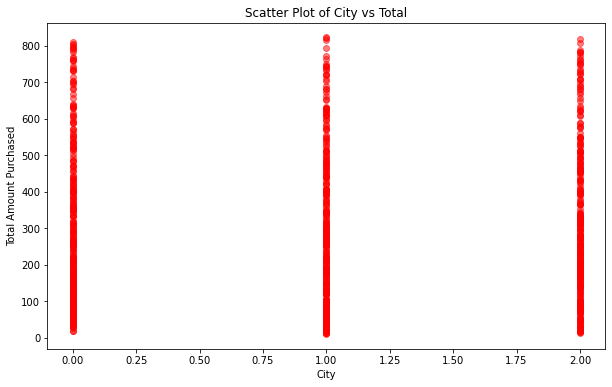

In [8]:
# Scatter plot for Branch vs Total
plt.figure(figsize=(10, 6))
plt.scatter(df_data['Branch'], df_data['Total'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Branch vs Total')
plt.xlabel('Branch')
plt.ylabel('Total Amount Purchased')
plt.show()

# Scatter plot for City vs Total
plt.figure(figsize=(10, 6))
plt.scatter(df_data['City'], df_data['Total'], color='red', alpha=0.5)
plt.title('Scatter Plot of City vs Total')
plt.xlabel('City')
plt.ylabel('Total Amount Purchased')
plt.show()

# Research Question 2 

In [9]:
# Aim is to predict Predicting Walmart sales on various factors of dataset
# Logistic Regression to predict the probability of sales exceeding the threshold as it deals with binary target variables.

# Define threshold for high sales (e.g., sales above the median)
threshold = df_data['Total'].median()

# Create binary target variable based on the threshold
df_data['High Sales'] = (df_data['Total'] > threshold).astype(int)

# Define predictors and target variable
X = df_data[['Product line', 'Rating']]  
y = df_data['High Sales']  

# Encode categorical variables
X = pd.get_dummies(X, columns=['Product line'])  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.42

Confusion Matrix:
 [[43 56]
 [60 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.43      0.43        99
           1       0.42      0.41      0.41       101

    accuracy                           0.42       200
   macro avg       0.42      0.42      0.42       200
weighted avg       0.42      0.42      0.42       200



**Accuracy: The model's accuracy is 0.42, or 42%. This shows the percentage of cases in the testing dataset that were correctly classified out of all instances.**


**Confusion Matrix: It indicates that the model accurately predicted 43 (true negatives) out of 99 cases where sales were not high (label 0), but mistakenly projected 56 as high sales (false positives). In a similar vein, of the 101 cases (label 1) in which sales were high, the model predicted correctly 41 (true positives) and mistakenly 60 (false negatives) as not having high sales.**

**Classification Report: Metrics like recall, accuracy, and F1-score are provided for every class (0 and 1). Recall calculates the percentage of true positive predictions among all real positive instances, whereas precision calculates the percentage of true positive forecasts across all positive predictions. Precision and recall are harmonic means, and the F1-score strikes a balance between both.**

**In conclusion, even though the model has a 42% accuracy rate, more research into the confusion matrix and classification report points to possible limitations in the model's functionality. For all groups, recall and precision are comparatively poor, suggesting that the model has difficulty correctly differentiating between high and low sales cases.**

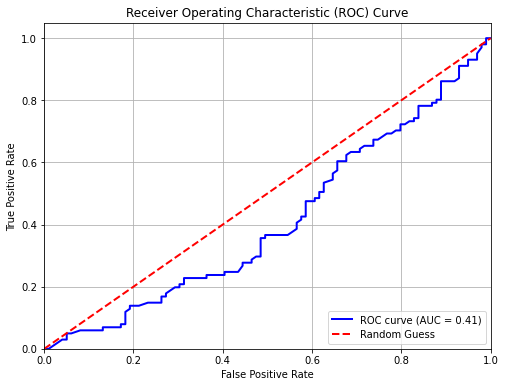

In [10]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Research Question 3

In [11]:
# Aim is to predict the customer type [normal or member] based on the dataset
# Random Forest [ensemble classification algorithm] is suitable for this task 
# As it handles both numerical and categorical data and reduce overfitting

# select the relevant columns for analysis
relavent_columns= ['Total', 'Product line', 'Customer type']

# Define predictors and target variable
X = df_data[['Total', 'Product line']]  # Features
y = df_data['Customer type']  # Target variable

# Encode categorical variables
X = pd.get_dummies(X, columns=['Product line'])  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46

Confusion Matrix:
 [[45 52]
 [56 47]]

Classification Report:
               precision    recall  f1-score   support

      Member       0.45      0.46      0.45        97
      Normal       0.47      0.46      0.47       103

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200



**The accuracy score:" 0.46 or 46%, represents the model correctly predicted the customer type (Member or Normal) for approximately 46% of the customers in the testing dataset.**

**The confusion matrix:**

**True Positives (TP): (45 instances).
True Negatives (TN): (47 instances).
False Positives (FP):(52 instances).
False Negatives (FN): (56 instances).
From the confusion matrix, we can see that the model tends to have more false predictions than true predictions, as both false positives (52) and false negatives (56) outnumber their respective true counterparts (45 and 47). This indicates that the model struggles to accurately differentiate between the two classes.**

**In conclusion, even though the model's accuracy of 46% indicates a moderate level of performance, a closer look at the classification report and confusion matrix indicates that the model may not be very good at correctly predicting the types of customers that they represent. This is supported by the relatively low values of precision, recall, and F1-score for both classes.**

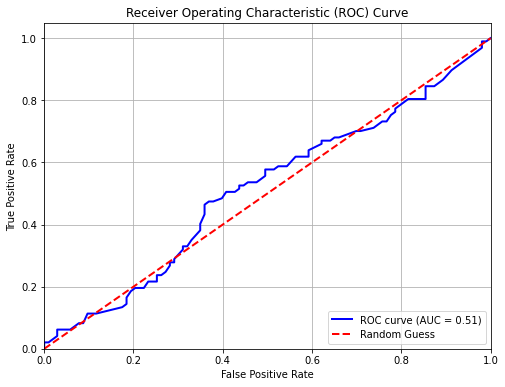

In [12]:

# Convert labels to binary format
y_test_binary = y_test.map({'Member': 1, 'Normal': 0})

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**computed the ROC curve and the ROC area under the curve (AUC) using the roc_curve() and auc() functions, respectively.Red dashed line represents the ROC curve of random guessing, and the blue line represents the ROC curve of the model. 
The closer the blue line is to the upper left corner, the better the model's performance.**